# Session 7 - Neural Networks for image data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [1]:
# generic tools
import numpy as np

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2023-03-21 13:05:39.775175: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

We're going to download the ```MNIST``` dataset again, so that we compare this pipeline to the baseline benchmarks we created previously.

In [2]:
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# normalise data
data = data.astype("float")/255.0

# (the data is already in black and white, so no need to greyscale)

# split data
(X_train, X_test, y_train, y_test) = train_test_split(data,
                                                    labels, 
                                                    test_size=0.2)

/home/coder/.local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# convert labels to one-hot encoding
lb = LabelBinarizer() # belong or does not belong to the class
y_train = lb.fit_transform(y_train) # is now a NDarray size 56000 (no. of test images) and 10, number of classes.
# a 1 for the number in the class it belongs to, and a 0 for the rest of the indices
y_test = lb.fit_transform(y_test)

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 784
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [4]:
# define architecture 784x256x128x10
model = Sequential() # sequential = feed forward
model.add(Dense(256, #add first hidden layer, # called dense because it is fully connected ! # i.e., feed forward fully connected network !! = sequential dense network ! 
                input_shape=(784,), # define input shape
                activation="relu")) # could also be sigmoid
model.add(Dense(128, # add second hidden layer, no need to define input shape in 2nd, it already knows 
                activation="relu"))
model.add(Dense(10, # output layer with 10 possible classes
                activation="softmax")) # softmax activation -> to squish joint probability and give a class output (for all 10 classes, which class is most probable ? out of 10 probability values between 0 and 1 that sum to 1)

# tensorflow adds bias to every layer. You can manually intervene, but not necessary for our purposes. 

2023-03-21 13:52:26.207633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Show summary of model architecture

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [7]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [8]:
# train model using SGD (stochastic gradient descent)
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd, 
              metrics=["accuracy"])

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [9]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, 
                    batch_size=32)

Epoch 1/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.5976 - accuracy: 0.8479 - val_loss: 0.3298 - val_accuracy: 0.9071
Epoch 2/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2776 - accuracy: 0.9226 - val_loss: 0.2583 - val_accuracy: 0.9249
Epoch 3/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2288 - accuracy: 0.9351 - val_loss: 0.2256 - val_accuracy: 0.9336
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1967 - accuracy: 0.9440 - val_loss: 0.1993 - val_accuracy: 0.9420
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1730 - accuracy: 0.9506 - val_loss: 0.1792 - val_accuracy: 0.9481
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1545 - accuracy: 0.9560 - val_loss: 0.1681 - val_accuracy: 0.9520
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1395 - accuracy: 0.9598 - val_loss: 0.1522 - val_accuracy:

## Visualise using ```matplotlib```

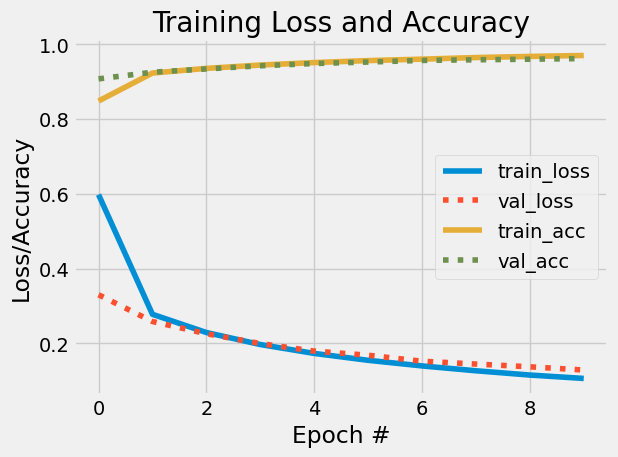

In [11]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [12]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

[INFO] evaluating network...
438/438 [==============================] - 1s 2ms/step


In [13]:
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1392
           1       0.98      0.98      0.98      1581
           2       0.95      0.97      0.96      1383
           3       0.95      0.95      0.95      1444
           4       0.96      0.96      0.96      1343
           5       0.97      0.93      0.95      1242
           6       0.97      0.98      0.97      1410
           7       0.97      0.96      0.97      1444
           8       0.94      0.95      0.95      1351
           9       0.95      0.94      0.95      1410

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too